<a href="https://colab.research.google.com/github/ATMCHGIT18/Tensorflow_Python/blob/master/02_TensorFlow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reminder: Modeling with tensorflow

Steps:

1. Get data ready (Turn them into tensors)
2. Build or pick a pretrained model
3. Fit the modelto the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your pretrained model

# Classification Problem

It consist of two or more than two classes (Multicalss Classification).

**Note:** Do not mistaken it with Multilabel classification.

***
**Multilabel Classification**: is when an entity would have multiple classes like one post in a sub redit would have several tags.

**Multiclass Classification**: is when an entity would only have one class but there are more than 2 classes in the problem like classification people of one region with their academic degree. e.g. Phd, BA,BM, and etc.

***


## Input and Output

* Input of classification is related to what input is. If it is an image then most common shape of our input would be
```Input = [batch_size, width, height, colour_channel]```
, but if it is something else we should first do the research or come up with idea of what feature of the data is important and put them as one dimention of our input.


* Output of classification problem is usually known and our output's shape is the number of classes.`Output = [number_of_classes]`


## Architecture of Classification Problem

The architecture is the same as other NNs but there are some differences.

* Different input and output shape.
* Different loss function.
* Different activation function.
* Different metrics.




## Hyperparameters

1. Input Layer Shape
2. Hidden Layer(s)
3. Neurons per Hidden Layer
4. Output Layer Shape
5. Hidden Activation Function
6. Output Activation Fucntion
7. Loss Function
8. Optimiser

## Coding Section

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import make_circles

## This will produce a large circle containing smaller circle within in 2d space

# Make 1000 samples
n_sample = 1000

# Create circles
X,y = make_circles(n_samples=n_sample,
                  noise=0.03,
                  random_state=42)

In [ ]:
# let's put all the dots we created as dataset into pandas datafrme

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circles.head()

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


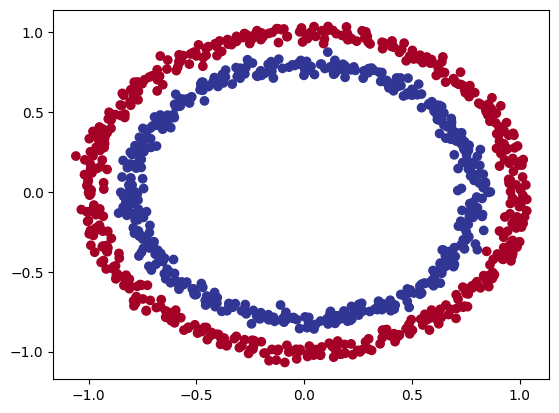

In [ ]:
# Visualising our data

plt.scatter(circles["X0"],circles["X1"],c=circles["Label"],cmap=plt.cm.RdYlBu)

We want to draw a closed surface that seperate our 2 classes completely.


In [ ]:
X.ndim,y.ndim


(2, 1)

In [ ]:
# First model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(X,y,epochs=100,verbose=0)
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4891 - loss: 0.6961  


[0.6942567825317383, 0.49399998784065247]

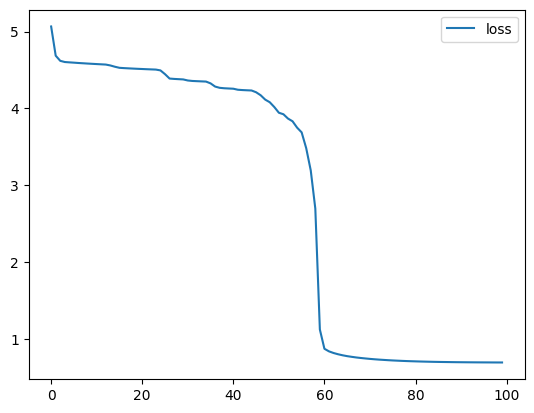

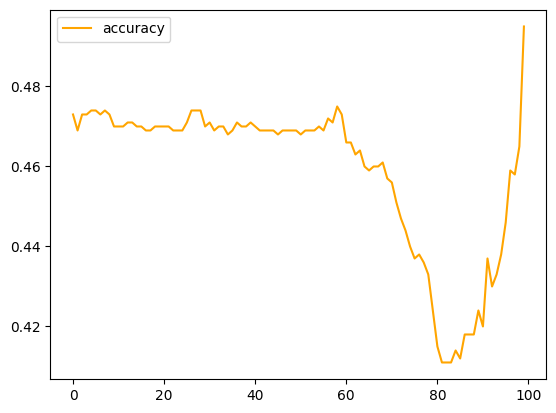

In [ ]:
plt.figure(1)
plt.plot(history.history["loss"],label="loss")
plt.legend()
plt.figure(2)
plt.plot(history.history["accuracy"],c='orange',label="accuracy")
plt.legend()

In [ ]:
# Second model with higher comlexity
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history1 = model1.fit(X,y,epochs=100,verbose=0)
model1.evaluate(X,y)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5447 - loss: 0.6927  


[0.6932099461555481, 0.5249999761581421]

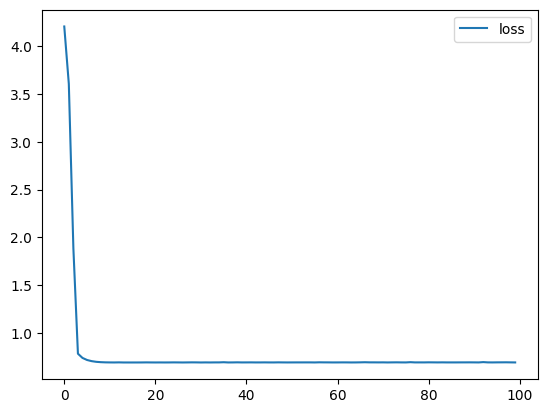

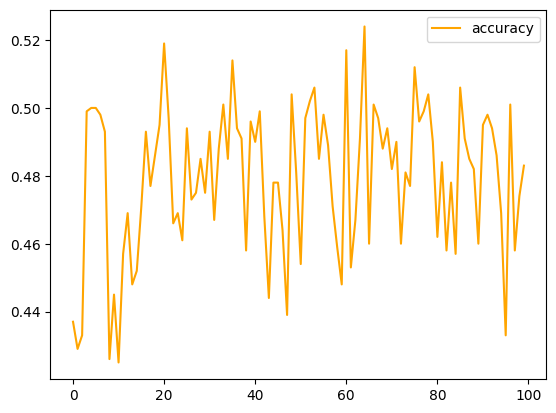

In [ ]:
plt.figure(1)
plt.plot(history1.history["loss"],label="loss")
plt.legend()
plt.figure(2)
plt.plot(history1.history["accuracy"],c='orange',label="accuracy")
plt.legend()

### Visualise Model's Prediction

To visualise our model's predictions we need to go throgh these steps:
* Take in a trained model , features (X) and labels(y)
* Create a `meshgrid` of the different X values
* Make predictions across the `meshgrid`
* Plot the predictions as well as a boundary line


**`Meshgrid`** look at this [link](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Ploting the decision boundary using X and y
  """

  # Define boundaries for our plot
  boundary_offset = 0.5

  x_min, x_max = X[:, 0].min() - boundary_offset, X[:, 0].max() + boundary_offset
  y_min, y_max = X[:, 1].min() - boundary_offset, X[:, 1].max() + boundary_offset

  # Initialising our meshgrid
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

  # Create X Values (We are gong to make predictions on them)
  ## ravel is just doing the flattening part for our matrix and return the matrix with 1 dimension.
  x_in = np.c_[xx.ravel(),yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass or binary classification
  if len(y_pred[0]) >1:
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Ploting the contoure line
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


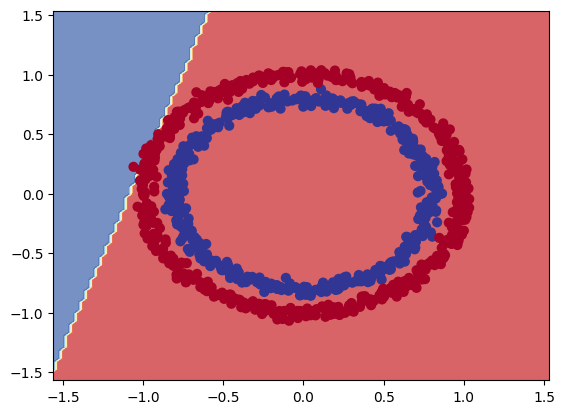

In [ ]:
plot_decision_boundary(model=model,X=X,y=y)

## Non-Linearity

The non-linarity if the key to this problem
For adding non-linearity to the model we use the non-linear activation function for this purpose.

In [ ]:
#S Set random seed for the reproducibility
tf.random.set_seed(42)

# Create new model with non linear activation function
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')])


# Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
history2 = model2.fit(X,y,epochs=100,verbose=0)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


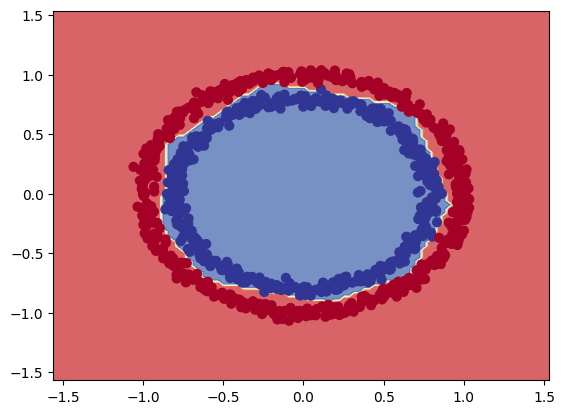

In [ ]:
plot_decision_boundary(model=model2,X=X,y=y)

In [ ]:
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9905 - loss: 0.1382  


[0.13033542037010193, 0.9940000176429749]

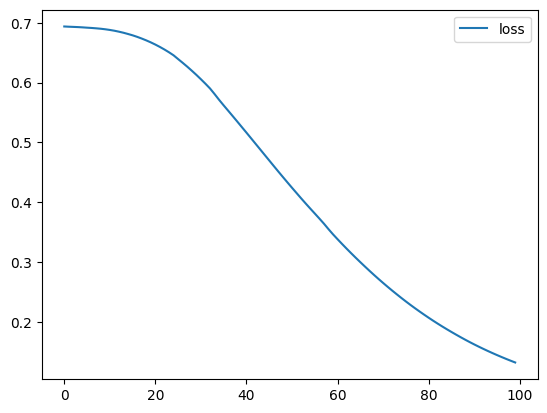

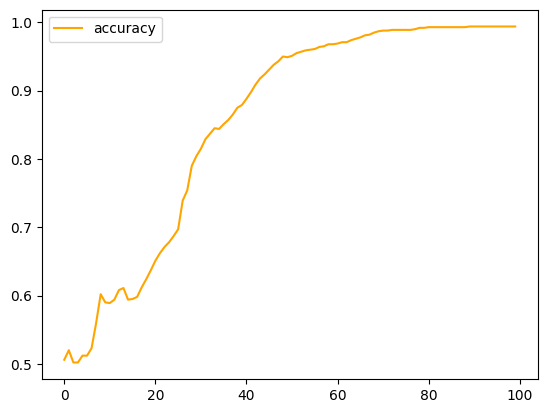

In [ ]:
plt.figure(1)
plt.plot(history2.history["loss"],label="loss")
plt.legend()
plt.figure(2)
plt.plot(history2.history["accuracy"],c='orange',label="accuracy")
plt.legend()

## Create Callback function to find the ideal Learning-Rate

Now we are going to create a function to find out the best and ideal learning rate.


In [ ]:
tf.random.set_seed(42)

# Create new model with non linear activation function
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')])


# Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Crearing learning rate callback
lr_callbacks = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history3 = model2.fit(X,y,epochs=100,verbose=0,callbacks=[lr_callbacks])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


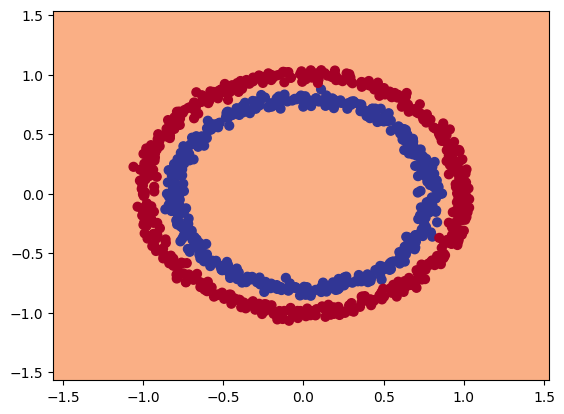

In [ ]:
plot_decision_boundary(model=model3,X=X,y=y)

In [ ]:
model3.evaluate(X,y)

# Based on the result our model is guessing again and not factually predict.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5131 - loss: 0.6962


[0.6983556151390076, 0.503000020980835]

## We can use the history object to plot the learning rate callbacks to find the best learning rate based on the loss values.

We want the loss value to be decreased so it is somehow derivative problem.


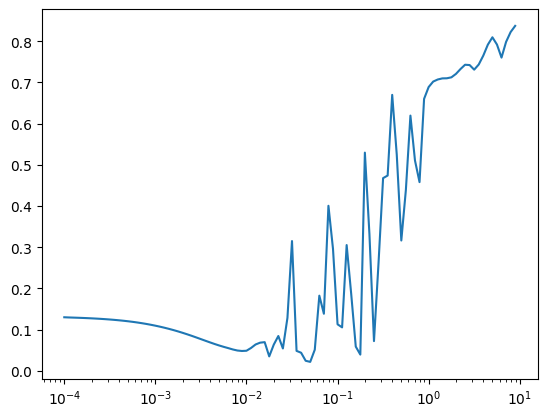

In [ ]:
# Plot the learning rate based on the loss value

lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.figure(1)
plt.semilogx(lrs,history3.history["loss"])

# Based on the figure in below we can conclude that the best learning rate is osmething in between 0.01 and 0.001 which is the Adam's default value.

## Classification evaluation mothods

These are some of the most common classification evaluation methods:

| Metric Name | Metric Formula | Code | When to Use|
| :---:       | :---:          | :---: | :---:     |
|Accuracy | Accuracy = $\frac{tp +tn}{tp + tn + fp + fn}$|`tf.keras.metrics.Accuracy()` or<br> `sklearn.mterics.accuracy_score()` | Default metrics for classification problems.<br>Not the best for imbalanced classes |
| Precision |Precision = $\frac{tp}{tp+fp}$ |`tf.keras.metrics.Precision()` <br>or<br>`sklearn.mterics.precision_score()`| Higher precision leads to less false positive|
| Recall| Recal = $\frac{tp}{tp+fn}$| `tf.keras.metrics.Recall()`<br>or<br>`sklearn.mterics.recall_score()`|Higher recall leads to less false negative|
|F1-score| F1-score = $2.\frac{precision.recall}{precision + recall}$|`ssklearn.mterics.f1_score()`|Combination of precision and recall <br> usually a good overall metric for a <br> classification model.|
|Confusion Matrix| N/A| `Custom function`<br>or<br>`sklearn.metrics.confusion_matrix()`| When comparing predicts to truth<br> labels to see where model gets<br> confused.Can be hard to use<br> with large numbers of classes.|

* There is another classification which is only in scikit-learn library:
`classification_report`

Now we are going to use these metrics for our models.



In [ ]:
# let's use confusion matrix for our model
# But first let's split our data into training and test datasets and then retrain it with the train dataset

X_train , y_train = X[:800] , y[:800]
X_test , y_test = X[800:],y[800:]

#S Set random seed for the reproducibility
tf.random.set_seed(42)

# Create new model with non linear activation function
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')])


# Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# fit the model again
history2 = model2.fit(X_train,y_train,epochs=100,verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


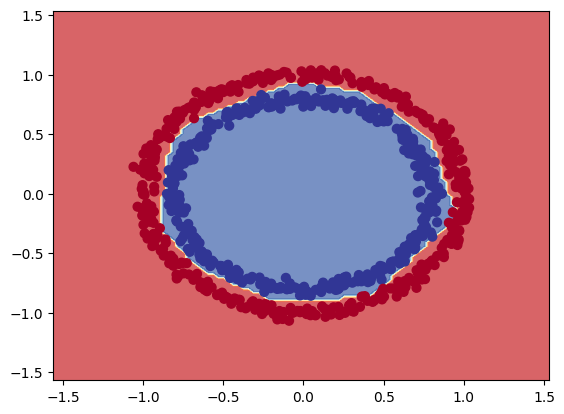

In [ ]:
plot_decision_boundary(model=model2,X=X_train,y=y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model2.predict(X_test)

confusion_matrix(y_test,y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# Now let's resolve the error here which means that our y_test is binary which contains only 0s and 1s but our y_pred is not 1s and 0s but it has some form of continuity

# We need to make a function to do so

def toBinary(input):
  output = []
  for i in input:
    if i>0.5:
      output.append(1)
    else:
      output.append(0)
  return output

# We could use round method

In [ ]:
y_preds = toBinary(y_preds)

confusion_matrix(y_test,y_preds)

array([[101,   0],
       [  0,  99]])

### Prettier Confusion Matrix

We are now going to make our confusion matrix prettier using the scikit learn and other libraries.

* `plt.Axes.marshow()`: [Link](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.matshow.html#matplotlib.axes.Axes.matshow)
* `plt.subplots()`: [Link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
  * **Note**: Don't get it wrong with [`plt.subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot)


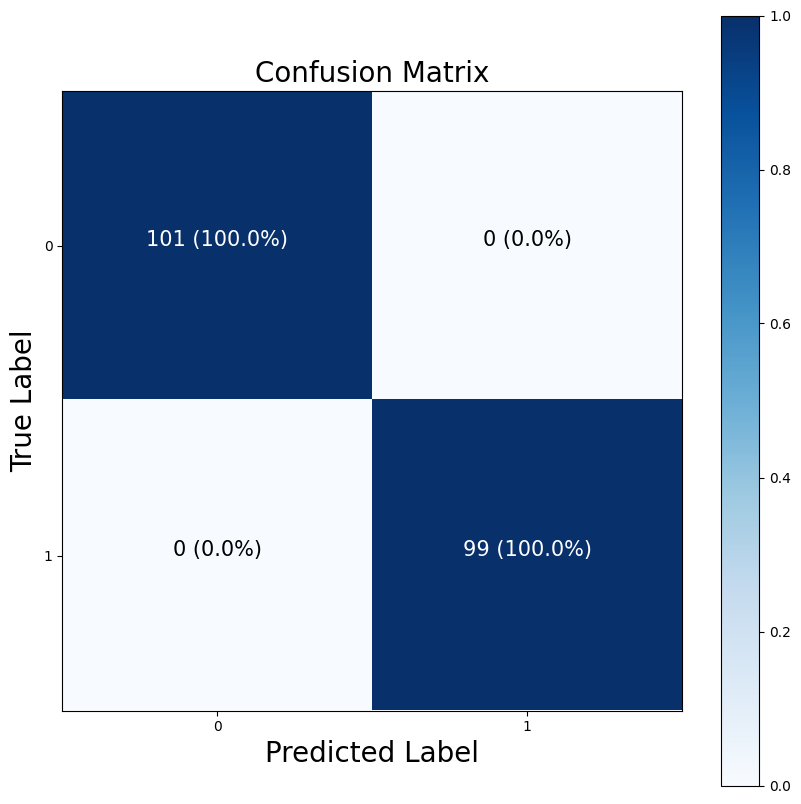

In [ ]:
# Try it now.
import itertools
figsize = (10, 10)

# Create confusion matrix
cfm = confusion_matrix(y_test,tf.round(y_preds))
cfm_norm = cfm.astype('float')/cfm.sum(axis=1)[:,np.newaxis]
n_classes = cfm.shape[0]

# Let's make it prettier
fig,ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cfm_norm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cfm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cfm.max() + cfm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
  plt.text(j, i, f"{cfm[i, j]} ({cfm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cfm[i, j] > threshold else "black",
           size=15)


# Working with bigger example ( Multiclass classification problem )

If you have more than 2 class classification

We now use a fashion-mnist data set for fashion [link here](https://www.tensorflow.org/datasets/catalog/fashion_mnist)


* **Note** Using `tf.keras.losses.CategoricalCrossentropy` we should use one-hot encoded and for integer we should use `tf.keras.losses.SparseCategoricalCrossentropy`

* Neural Network prefer the data being normalised.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
data = tf.keras.datasets.fashion_mnist

X,test = data.load_data()

In [13]:
X_train = X[0]
label_train = X[1]

X_test = test[0]
label_test = test[1]

In [21]:
label_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [26]:
import random

def random_plot_image(num):
  i = random.randint(0,len(X_train))
  plt.figure(figsize=(15,15))
  for i in range(num):
    plt.subplot(num,num,i+1)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(label_name[label_train[i]])
  plt.grid(False)
  plt.show()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(X_train,label_train,epochs=10,validation_data=(X_test,label_test),verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6470 - loss: 4.8344 - val_accuracy: 0.6874 - val_loss: 0.9840
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7631 - loss: 0.7273 - val_accuracy: 0.7408 - val_loss: 0.7712
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7752 - loss: 0.6802 - val_accuracy: 0.7975 - val_loss: 0.6210
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7883 - loss: 0.6158 - val_accuracy: 0.7473 - val_loss: 0.7314
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7892 - loss: 0.6256 - val_accuracy: 0.7934 - val_loss: 0.6005
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8112 - loss: 0.5520 - val_accuracy: 0.7863 - val_loss: 0.6206
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8191 - loss: 0.5219 - val_accuracy: 0.8165 - val_loss: 0.5539
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8282 - loss: 0.4798 - val_accura

In [30]:
# Now let's normalise the data and then feed it into the model

X_train_norm = X_train/255
X_test_norm = X_test/255

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model1.fit(X_train_norm,label_train,epochs=10,validation_data=(X_test_norm,label_test),verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7616 - loss: 0.6882 - val_accuracy: 0.8403 - val_loss: 0.4448
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8588 - loss: 0.3900 - val_accuracy: 0.8573 - val_loss: 0.3947
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8711 - loss: 0.3553 - val_accuracy: 0.8622 - val_loss: 0.3791
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8806 - loss: 0.3296 - val_accuracy: 0.8756 - val_loss: 0.3582
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8837 - loss: 0.3098 - val_accuracy: 0.8712 - val_loss: 0.3598
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8917 - loss: 0.2910 - val_accuracy: 0.8732 - val_loss: 0.3555
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2814 - val_accuracy: 0.8786 - val_loss: 0.3386
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.2704 -

In [31]:
# Let's have a confusion matrix now
from sklearn.metrics import confusion_matrix

y_preds = model1.predict(X_test_norm)

y_preds = np.argmax(y_preds,axis=1)

confusion_matrix(label_test,y_preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[861,   3,  18,  43,   6,   2,  60,   0,   7,   0],
       [  1, 971,   0,  19,   5,   0,   1,   0,   2,   1],
       [ 16,   2, 801,  13,  98,   0,  67,   1,   2,   0],
       [ 15,  15,  21, 899,  34,   0,  13,   0,   3,   0],
       [  1,   1, 110,  32, 813,   1,  41,   0,   1,   0],
       [  0,   0,   0,   1,   0, 952,   0,  29,   1,  17],
       [181,   1, 104,  50,  86,   0, 566,   0,  12,   0],
       [  0,   0,   0,   0,   0,   7,   0, 927,   0,  66],
       [  4,   0,   9,   5,   5,   2,   4,   6, 965,   0],
       [  0,   0,   0,   0,   0,   6,   1,  17,   0, 976]])

In [32]:
# Make prettier confustion matrix by creating a function to do so
import itertools

def make_confusion_matrix(y_test,y_pred,figsize=(15,15),classes=None):
  # Try it now.
  # Create confusion matrix
  cfm = confusion_matrix(y_test,tf.round(y_pred))
  cfm_norm = cfm.astype('float')/cfm.sum(axis=1)[:,np.newaxis]
  n_classes = cfm.shape[0]

  # Let's make it prettier
  fig,ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cfm_norm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cfm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cfm.max() + cfm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
    plt.text(j, i, f"{cfm[i, j]} ({cfm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cfm[i, j] > threshold else "black",
            size=15)


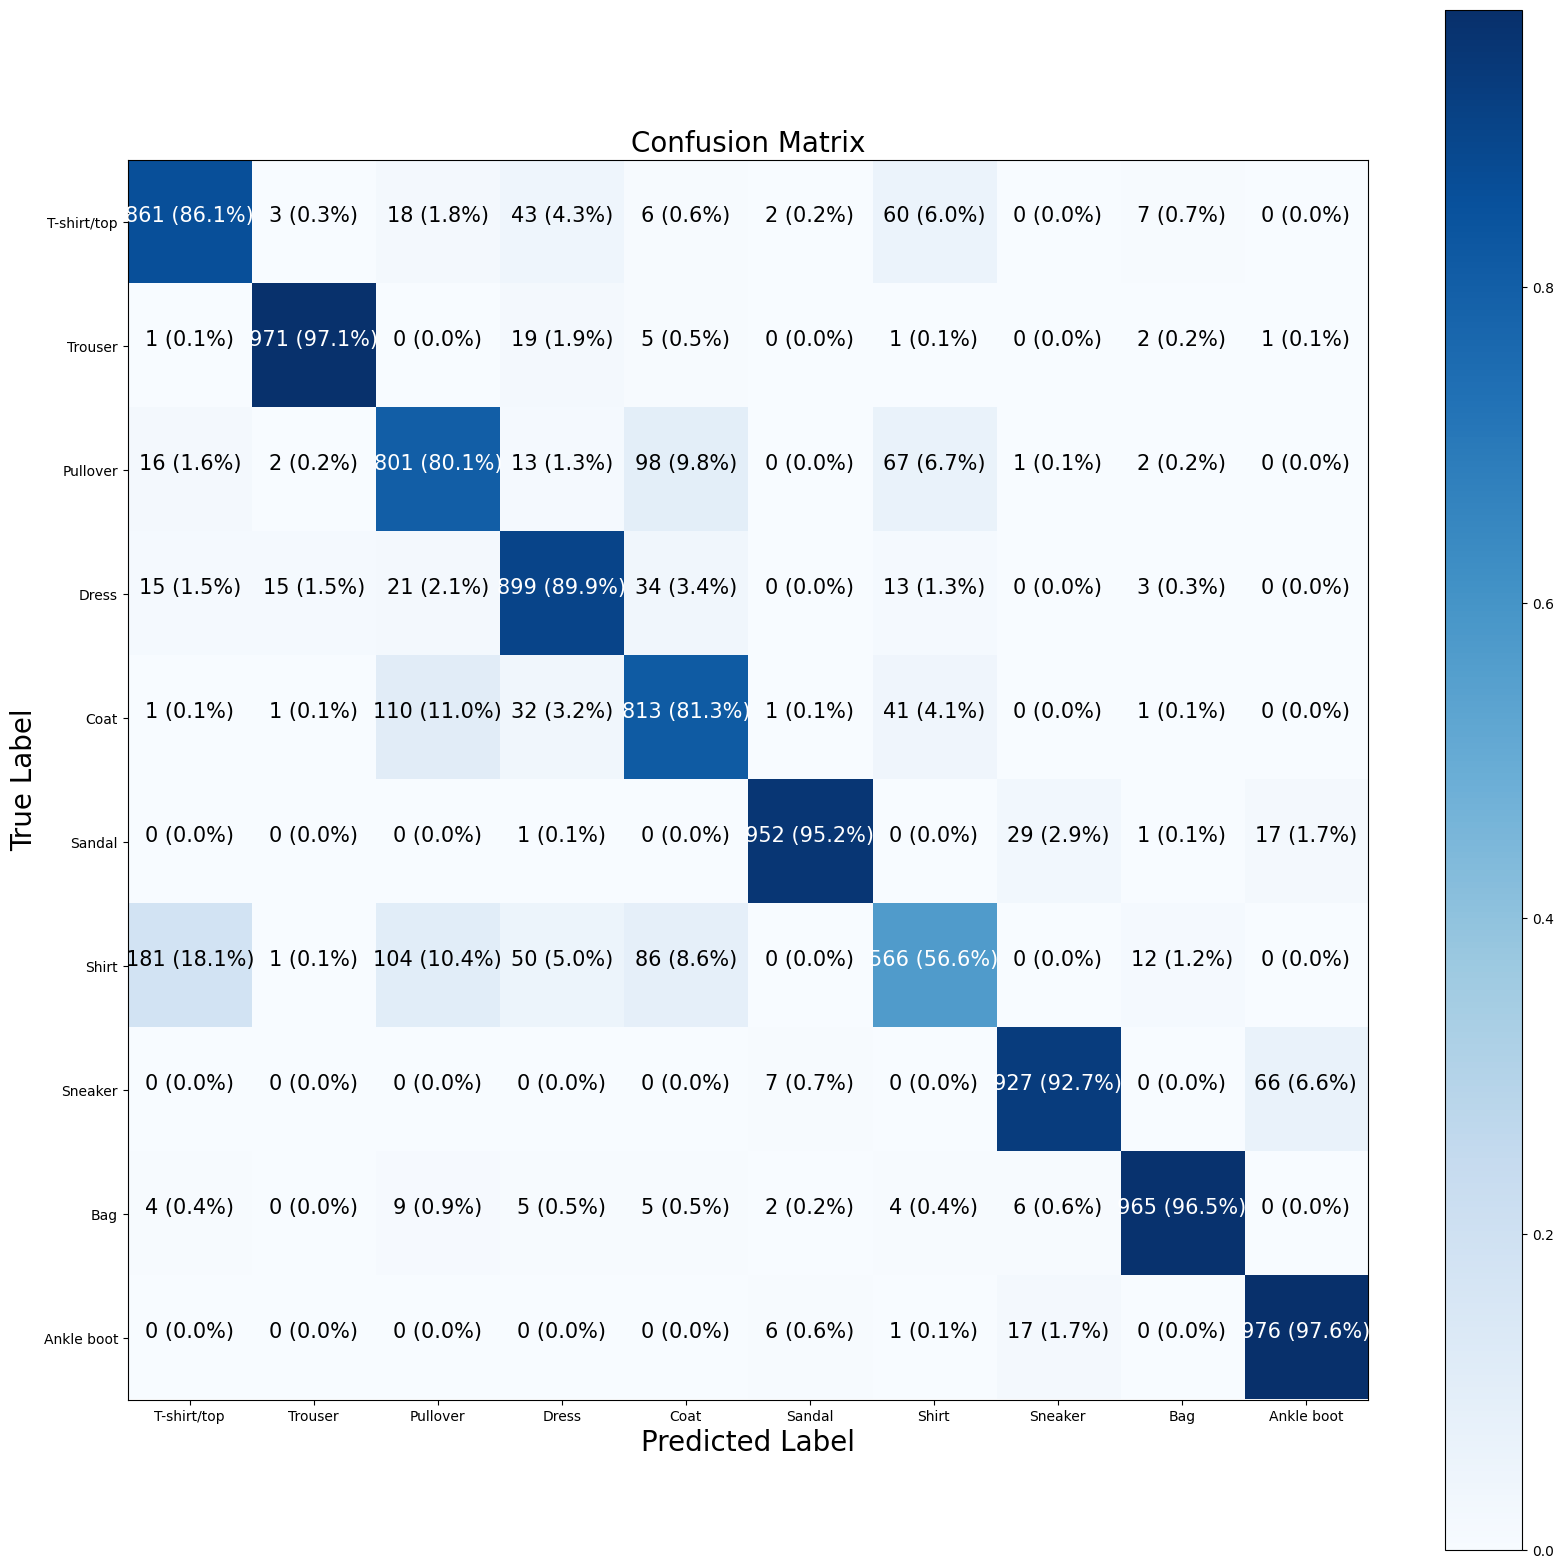

In [34]:
make_confusion_matrix(label_test,y_preds,classes=label_name,figsize=(20,20))